# Homework 5
This homework requires `wine.csv`, and the `tidyverse` and `Rtsne` packages. Install them if you haven't already!  
See the following link for how to add new packages to Binder: https://github.com/rjenki/BIOS512?tab=readme-ov-file#adding-packages-to-installr-later.   
**For readability and easier processing, please make each question part a different code chunk.**

In [1]:
library(tidyverse)
library(Rtsne)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Question 1  

#### a) Import your data.  
#### b) Check out the columns present using one of R's data frame summary.  
#### c) Get summary statistics on the numeric variables.  

In [13]:
#a)
wine_data <- read.csv("wine.csv")

In [16]:
#b)
library(tidyverse)
glimpse(wine_data)

Rows: 178
Columns: 14
$ Alcohol                       <dbl> 14.23, 13.20, 13.16, 14.37, 13.24, 14.20…
$ Malicacid                     <dbl> 1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.87…
$ Ash                           <dbl> 2.43, 2.14, 2.67, 2.50, 2.87, 2.45, 2.45…
$ Alcalinity_of_ash             <dbl> 15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14.6…
$ Magnesium                     <int> 127, 100, 101, 113, 118, 112, 96, 121, 9…
$ Total_phenols                 <dbl> 2.80, 2.65, 2.80, 3.85, 2.80, 3.27, 2.50…
$ Flavanoids                    <dbl> 3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.52…
$ Nonflavanoid_phenols          <dbl> 0.28, 0.26, 0.30, 0.24, 0.39, 0.34, 0.30…
$ Proanthocyanins               <dbl> 2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.98…
$ Color_intensity               <dbl> 5.64, 4.38, 5.68, 7.80, 4.32, 6.75, 5.25…
$ Hue                           <dbl> 1.04, 1.05, 1.03, 0.86, 1.04, 1.05, 1.02…
$ X0D280_0D315_of_diluted_wines <dbl> 3.92, 3.40, 3.17, 3.45, 2.93, 2.85, 3.58…
$ Proline         

In [12]:
#c) 
summary(wine_data)

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

## Question 2

#### a) Scale and center your data  
*Hint:* Use a `mutate()` statement across all columns **except class** with `function(x) as.numeric(scale(x))`.

#### b) Based on what you saw in the summary statistic table from the imported data, why would scaling and centering this data be helpful before we perform PCA?


In [25]:
wine_centered <- wine_data %>%
  mutate(across(-class, ~ as.numeric(scale(.x, scale = FALSE))))


In [26]:
summary(wine_centered)

    Alcohol           Malicacid            Ash            Alcalinity_of_ash  
 Min.   :-1.97062   Min.   :-1.5963   Min.   :-1.006517   Min.   :-8.894944  
 1st Qu.:-0.63812   1st Qu.:-0.7338   1st Qu.:-0.156517   1st Qu.:-2.294944  
 Median : 0.04938   Median :-0.4713   Median :-0.006517   Median : 0.005056  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.000000   Mean   : 0.000000  
 3rd Qu.: 0.67688   3rd Qu.: 0.7462   3rd Qu.: 0.190983   3rd Qu.: 2.005056  
 Max.   : 1.82938   Max.   : 3.4637   Max.   : 0.863483   Max.   :10.505056  
   Magnesium       Total_phenols        Flavanoids      Nonflavanoid_phenols
 Min.   :-29.742   Min.   :-1.31511   Min.   :-1.6893   Min.   :-0.23185    
 1st Qu.:-11.742   1st Qu.:-0.55261   1st Qu.:-0.8243   1st Qu.:-0.09185    
 Median : -1.742   Median : 0.05989   Median : 0.1057   Median :-0.02185    
 Mean   :  0.000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000    
 3rd Qu.:  7.258   3rd Qu.: 0.50489   3rd Qu.: 0.8457   3rd Qu.: 0.07

In [ ]:
#b)
Looking at the summary data, scaling this data woud be helpful because there is a wide range of numbers and scaling would help make variables compareable for the PCA model to work.

## Question 3

#### a) Perform PCA

#### b) How much of the total variance is explained by PC1? PC2? What function do we use to see that information?

#### c) Why are we doing PCA first?

#### d) What is the rotation matrix? Print it explicitly.  
*Hint:* Check the notes for a simple way to do this!

#### e) Plot PC1 vs. PC2, using the wine class as labels for coloring.  
*Hint:* You'll first need a data set with only PC1 and PC2, then add back the class variable from your scaled data set with a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### f) What do you see after plotting PC1 vs. PC2? What does this mean in context of wine classes?

#### g) Give an example of data where PCA would fail. You can describe the data or do a simulation.  
*Hint:* Our notes have a few examples!

#### h) Explain the difference between vector space and manifold, and how these terms apply to what we did/will do with T-SNE.


In [29]:
#a)
PCA_ <-prcomp(wine_centered)

In [30]:
#b)
summary(PCA_)
# 99.71% of the total variance is explained by PC1 and 0.17% of the variance is explained by PC2

Importance of components:
                            PC1      PC2    PC3     PC4     PC5     PC6    PC7
Standard deviation     314.9635 13.13532 3.0873 2.25850 1.13393 0.93175 0.5357
Proportion of Variance   0.9981  0.00174 0.0001 0.00005 0.00001 0.00001 0.0000
Cumulative Proportion    0.9981  0.99982 0.9999 0.99997 0.99998 0.99999 1.0000
                          PC8    PC9   PC10   PC11   PC12   PC13    PC14
Standard deviation     0.3941 0.3372 0.2939 0.2149 0.1869 0.1441 0.08996
Proportion of Variance 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.00000
Cumulative Proportion  1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.00000

In [ ]:
#c) We did PCA first to create a matrix that brings the most important components of our data to the front. 

In [33]:
#d)
PCA_$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Alcohol,-0.0016592619,-1.204267e-03,-0.01830354,-0.136988601,-0.048932608,-0.202080449,-8.901163e-01,3.490280e-01,-1.042972e-01,0.0575902207,-0.0890749178,-3.477671e-02,4.240326e-03,-1.342199e-02
Malicacid,0.0006810190,-2.159531e-03,-0.12455946,-0.156739376,0.528930958,-0.803839930,1.468581e-01,-7.552074e-02,-1.022552e-02,-0.0336100827,0.0077436199,3.573628e-02,-6.323570e-02,1.205487e-02
Ash,-0.0001949052,-4.593996e-03,-0.05129289,0.012047122,-0.025845659,-0.041693904,-5.034930e-02,-1.505281e-01,-6.888147e-02,-0.1071613371,0.3532557832,-8.914869e-01,8.648809e-02,1.623446e-01
Alcalinity_of_ash,0.0046713046,-2.646070e-02,-0.92809986,0.356990103,-0.069611267,0.023859516,-3.593720e-02,1.139207e-02,2.441283e-03,-0.0099803583,-0.0026586178,5.931059e-02,-2.694858e-04,6.483270e-05
Magnesium,-0.0178679787,-9.993399e-01,0.02998454,0.004754117,0.006452123,0.001349008,-2.065027e-03,-3.568638e-03,1.632307e-03,0.0008647093,-0.0016384061,2.620277e-03,-5.009661e-04,-2.271269e-03
Total_phenols,-0.0009898316,-8.747309e-04,0.04276110,0.076452064,-0.320080904,-0.228319660,6.567984e-02,-8.990297e-02,-3.642319e-01,0.7196957875,0.3933791381,1.356768e-01,1.908158e-02,3.464768e-02
Flavanoids,-0.0015672929,5.865826e-05,0.09026712,0.172191025,-0.535695633,-0.357645070,7.945528e-02,-2.049005e-01,-3.849304e-01,-0.3184589500,-0.4852223379,-8.051266e-02,1.971202e-04,-8.667150e-02
Nonflavanoid_phenols,0.0001230870,1.353994e-03,-0.01372151,-0.010593546,0.029288874,0.016951591,5.403887e-05,9.899527e-04,-2.887276e-02,-0.0177935045,0.1750692832,-1.164653e-01,-1.329541e-01,-9.672182e-01
Proanthocyanins,-0.0006006091,-5.002227e-03,0.02623713,0.051606406,-0.253787072,-0.197181268,3.517404e-01,8.477276e-01,1.212945e-01,-0.1040244264,0.1313895856,-8.704446e-02,1.502505e-02,1.929259e-02
Color_intensity,-0.0023271272,-1.511422e-02,-0.30320298,-0.856516199,-0.367299181,0.005507929,9.328967e-02,-1.083719e-01,1.108008e-01,-0.0445052328,0.0357823455,3.763496e-02,-4.256684e-02,7.836890e-03


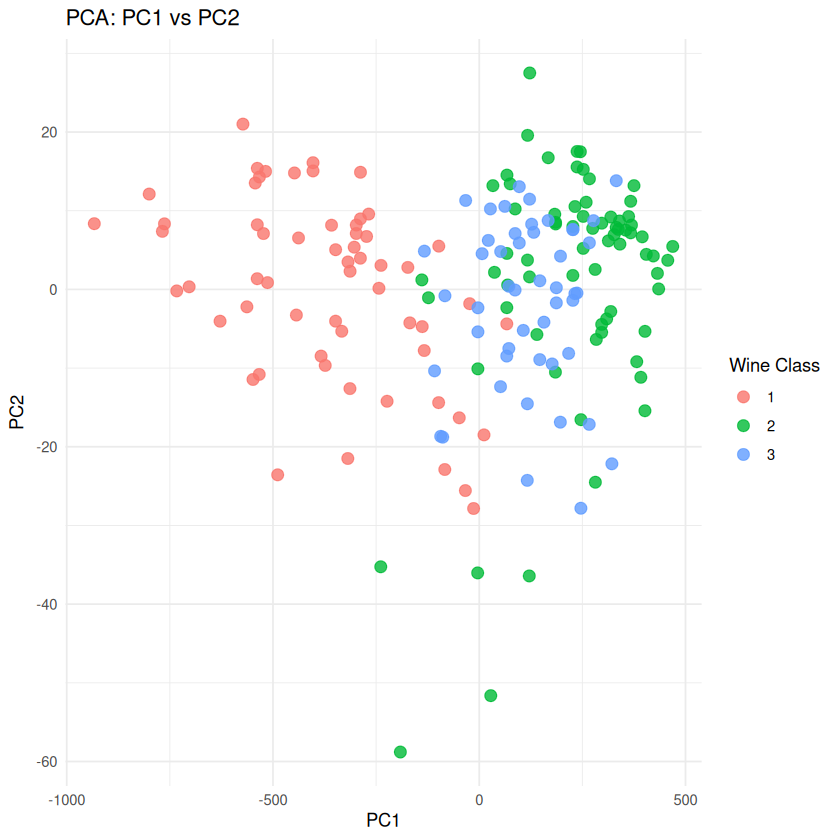

In [36]:
#e)
library(ggplot2)
library(dplyr)

# Extract only PC1 and PC2 scores
pca_scores <- as.data.frame(PCA_$x[, 1:2])  # columns 1 and 2 only
colnames(pca_scores) <- c("PC1", "PC2")      # rename for clarity

# Add back the 'class' column from the original data
pca_scores <- pca_scores %>%
  mutate(class = wine_data$class)
 

# Plot
ggplot(pca_scores, aes(x = PC1, y = PC2, color = factor(class))) +
  geom_point(size = 3, alpha = 0.8) +
  labs(title = "PCA: PC1 vs PC2",
       x = "PC1",
       y = "PC2",
       color = "Wine Class") +
  theme_minimal()


In [ ]:
#f) When mapping PC1 and PC2, it looks Wine class 1 clusters togeter, and map lower on the scale for pc1 but high for PC2.  However Clas 2 and 3 overlap with each other and
# have a high score for PC1 and PC2. meaning wine class 2 and 3 are important in both PC1 and PC2 but wine class 1 show up more in PC 2. 

In [ ]:
#g) Data where there isn't a linear relationship between variables, PCA would not work

In [ ]:
#h) Vector space is a liniear organization of data, similar to PCA whereas Manifold is a nonlinear representation od our data, and represents the data in 2 d context. 

## Question 4
#### a) Perform T-SNE
Set `seed = 123`.  
*Hint:* Subset your PCA results to PC1–PC10, add the class variable back in, remove duplicates, then perform T-SNE.

#### b) Plot the results in 2D
*Hint:* Convert your T-SNE results to a tibble and add back the class variable from your scaled data set using a `mutate()` statement. Then, you can use `color = factor(class)` in your `ggplot` statement.

#### c) Why didn't we stop at PCA?


#### d) What other types of data does this workflow make sense for?



In [48]:
#a)
tsne_data <- PCA_$x[,1:10]

In [53]:
install.packages("Rtsne")
library(Rtsne)
set.seed(123)
tsne <-Rtsne(tsne_data, dims =2, perplexity=3, verbose =TRUE, max_iter=500)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Performing PCA
Read the 178 x 10 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 3.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.00 seconds (sparsity = 0.060914)!
Learning embedding...
Iteration 50: error is 71.348666 (50 iterations in 0.01 seconds)
Iteration 100: error is 64.215844 (50 iterations in 0.01 seconds)
Iteration 150: error is 60.052486 (50 iterations in 0.01 seconds)
Iteration 200: error is 58.442253 (50 iterations in 0.01 seconds)
Iteration 250: error is 55.402915 (50 iterations in 0.01 seconds)
Iteration 300: error is 1.319054 (50 iterations in 0.01 seconds)
Iteration 350: error is 0.562956 (50 iterations in 0.01 seconds)
Iteration 400: error is 0.349995 (50 iterations in 0.01 seconds)
Iteration 450: error is 0.316925 (50 iterations in 0.01 seconds)
Iteration 500: error is 0.291169 (50 iterations in 0.01 seconds)
Fitting performed in 0.07 seconds.


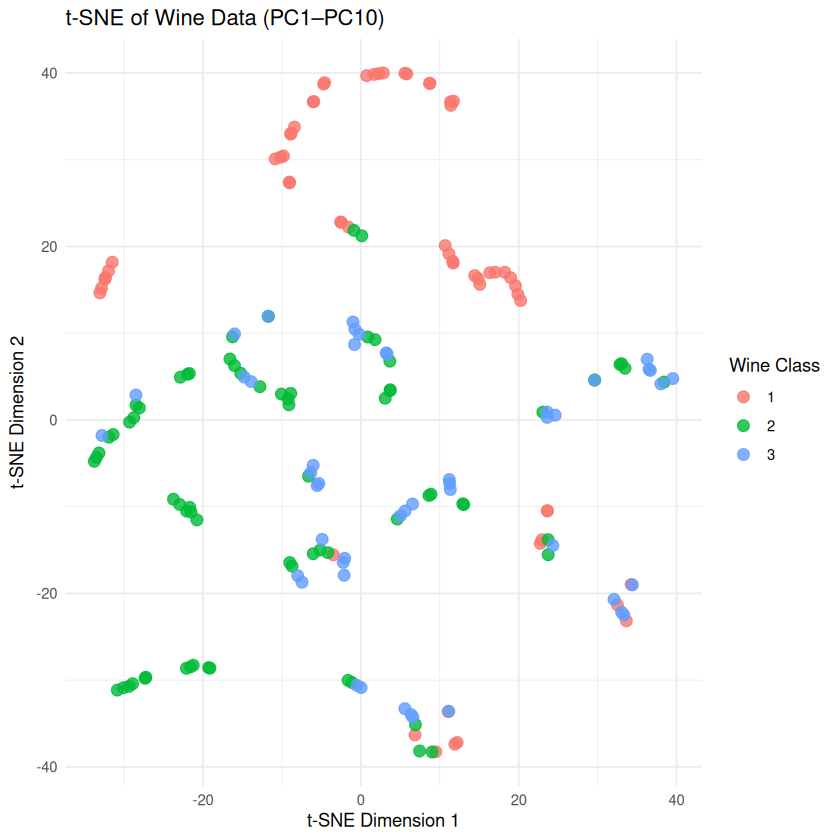

In [58]:
library(ggplot2)
library(dplyr)

tsne_df <- as.data.frame(tsne$Y)
colnames(tsne_df) <- c("Dim1", "Dim2")


tsne_df <- tsne_df %>%
  mutate(class = wine_data$class)

#b)

print(ggplot(tsne_df, aes(x = Dim1, y = Dim2, color = factor(class))) +
  geom_point(size = 3, alpha = 0.8) +
  labs(title = "t-SNE of Wine Data (PC1–PC10)",
       x = "t-SNE Dimension 1",
       y = "t-SNE Dimension 2",
       color = "Wine Class") +
 theme_minimal()
)

In [ ]:
#c 
We did not stop at PCA because doing a TSNE makes our visual representation non linear, so we we are able to see curves in our data. 

In [ ]:
#d
Other data wgere linear representation doesnt actually capture the data. 